In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,KFold,cross_val_score,learning_curve
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder,StandardScaler
from google.colab import files
uploaded = files.upload()

df = pd.read_csv('breast-cancer.csv')
df.head()

Saving breast-cancer.csv to breast-cancer (2).csv


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [15]:
categorical_cols = df.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()
for col in categorical_cols:
  df[col] = label_encoder.fit_transform(df[col])

In [16]:
X = df.drop(['id','diagnosis'],axis=1)
y = df['diagnosis']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [17]:
svc = SVC(kernel='linear',C=1,random_state=42)
kfold = KFold(n_splits = 5,shuffle = True,random_state = 42)
cross_val = cross_val_score(svc,X_scaled,y,cv=kfold)
print("Accuracy Scores:",cross_val)
print("Mean Accuracy:",np.mean(cross_val))

Accuracy Scores: [0.95614035 0.98245614 0.96491228 0.99122807 0.96460177]
Mean Accuracy: 0.9718677224033534


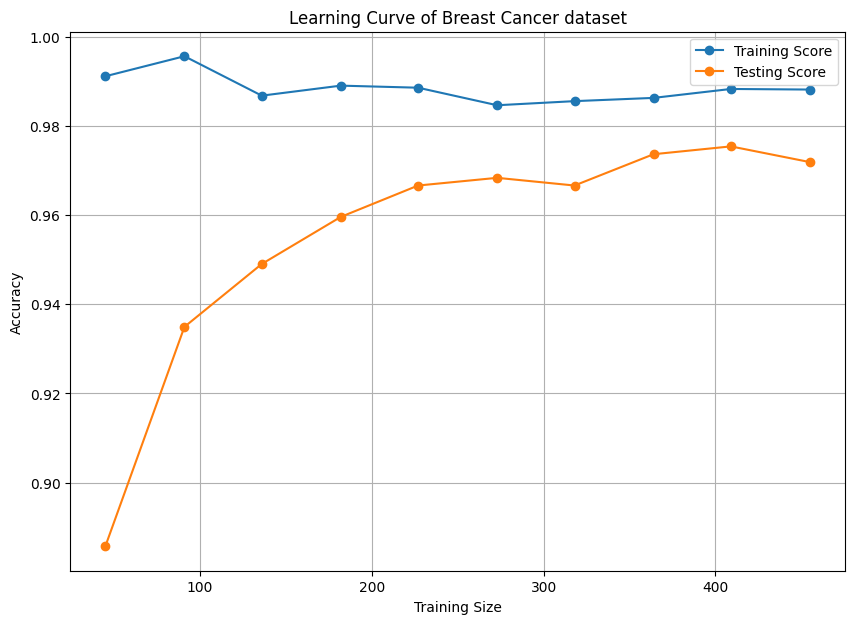

In [18]:
train_sizes,train_scores,test_scores = learning_curve(svc,X_scaled,y,cv=kfold,scoring='accuracy',train_sizes=np.linspace(0.1,1.0,10),random_state=42)

train_mean = np.mean(train_scores,axis=1)
test_mean = np.mean(test_scores,axis=1)

plt.figure(figsize=(10,7))
plt.plot(train_sizes,train_mean,'o-',label='Training Score')
plt.plot(train_sizes,test_mean,'o-',label='Testing Score')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve of Breast Cancer dataset')
plt.grid(True)
plt.legend()

Underfitting occurs when a model is too simple to capture the underlying structure of the data. It performs poorly on both the training and validation sets, indicating it has not learned enough.

Overfitting, on the other hand, happens when a model is too complex and learns the training data—including noise—too well. As a result, it performs excellently on training data but poorly on validation/test data due to poor generalization.